# CNNでMNISTを学習

Train on 60000 samples, validate on 10500 samples
Epoch 1/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.2367 - acc: 0.9285 - val_loss: 0.0542 - val_acc: 0.9839
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0921 - acc: 0.9736 - val_loss: 0.0400 - val_acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0708 - acc: 0.9797 - val_loss: 0.0409 - val_acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0620 - acc: 0.9823 - val_loss: 0.0294 - val_acc: 0.9909
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0584 - acc: 0.9834 - val_loss: 0.0240 - val_acc: 0.9923
Epoch 6/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0550 - acc: 0.9843 - val_loss: 0.0229 - val_acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0551 - acc: 0.9842 - val_loss: 0.0196 - 

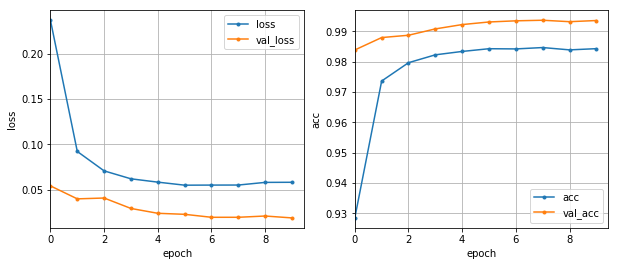

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']
acc     = history.history['acc']
val_acc = history.history['val_acc']
nb_epoch = len(loss)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(loss, marker='.', label='loss')
ax[0].plot(val_loss, marker='.', label='val_loss')
ax[0].legend(loc='best')
ax[0].grid(True)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_xlim(0)
ax[1].plot(acc, marker='.', label='acc')
ax[1].plot(val_acc, marker='.', label='val_acc')
ax[1].legend(loc='best')
ax[1].grid(True)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].set_xlim(0)
plt.show()

#### CNNでMNISTを識別した。1エポック目から急激に正解率、ロスともに良くなっており、最終的には98%以上の識別率を出した。

# CNNでCIFAR10を学習

Train on 50000 samples, validate on 8750 samples
Epoch 1/20
50000/50000 [==============================] - 128s 3ms/step - loss: 1.7017 - acc: 0.3888 - val_loss: 1.3739 - val_acc: 0.4998
Epoch 2/20
50000/50000 [==============================] - 129s 3ms/step - loss: 1.3254 - acc: 0.5328 - val_loss: 1.0520 - val_acc: 0.6311
Epoch 3/20
50000/50000 [==============================] - 126s 3ms/step - loss: 1.1762 - acc: 0.5882 - val_loss: 1.0092 - val_acc: 0.6466
Epoch 4/20
50000/50000 [==============================] - 127s 3ms/step - loss: 1.0846 - acc: 0.6241 - val_loss: 0.8372 - val_acc: 0.7184
Epoch 5/20
50000/50000 [==============================] - 124s 2ms/step - loss: 1.0191 - acc: 0.6457 - val_loss: 0.8281 - val_acc: 0.7102
Epoch 6/20
50000/50000 [==============================] - 135s 3ms/step - loss: 0.9736 - acc: 0.6618 - val_loss: 0.7187 - val_acc: 0.7552
Epoch 7/20
50000/50000 [==============================] - 122s 2ms/step - loss: 0.9418 - acc: 0.6727 - val_loss: 0.7218 - v

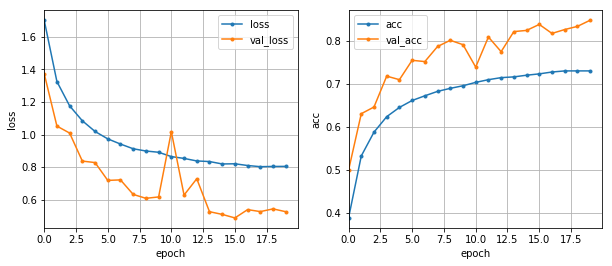

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_valid = x_valid.reshape(x_valid.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']
nb_epoch = len(loss)
acc     = history.history['acc']
val_acc = history.history['val_acc']
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(loss, marker='.', label='loss')
ax[0].plot(val_loss, marker='.', label='val_loss')
ax[0].legend(loc='best')
ax[0].grid(True)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_xlim(0)
ax[1].plot(acc, marker='.', label='acc')
ax[1].plot(val_acc, marker='.', label='val_acc')
ax[1].legend(loc='best')
ax[1].grid(True)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].set_xlim(0)
plt.show()

In [16]:
acc     = history.history['acc']
val_acc = history.history['val_acc']
ax[0].plot(loss, marker='.', label='loss')
ax[0].plot(val_loss, marker='.', label='val_loss')
ax[0].legend(loc='best')
ax[0].grid(True)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_xlim(0)
ax[1].plot(acc, marker='.', label='acc')
ax[1].plot(val_acc, marker='.', label='val_acc')
ax[1].legend(loc='best')
ax[1].grid(True)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].set_xlim(0)
plt.show()

#### val_lossがこれ以上下がりそうにないため、これ以上学習しても意味はなさそうだ。 今回の実験ではテストデータへの正解率は73％程度となった。全結合層のみの場合と比べると2倍以上の識別率となっており、CNNの凄さがわかった。